### Synthetic Retail Sales Data (2022-2024)

### 1. The Setup - Preparing the Groundwork

#### 1.1 Importing Necessary Libraries

In [3]:
# Import pandas for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations (though less used here, it's a good practice)
import numpy as np
# Import matplotlib.pyplot for basic plotting
import matplotlib.pyplot as plt
# Import seaborn for enhanced statistical data visualization
import seaborn as sns

# Configure display options for better readability
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1.2 Loading the Sales Data

In [10]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Retail\retail_sales_synthetic.csv")

### 2. Data Preparation

#### 2.1 Removing Invalid Records

In [11]:
# Drop rows where 'revenue' is zero, indicating invalid or incomplete sales records
initial_rows = len(df)
df.drop(df[df["revenue"] == 0].index, inplace=True)
final_rows = len(df)

print(f"Initial number of rows: {initial_rows}")
print(f"Rows removed (Revenue = 0): {initial_rows - final_rows}")
print(f"Final number of rows: {final_rows}")

Initial number of rows: 164400
Rows removed (Revenue = 0): 4749
Final number of rows: 159651


#### 2.2 Converting Date column to the datetime format

In [12]:
# Convert the 'date' column to datetime objects
df["date"] = pd.to_datetime(df["date"])

# Extract the Year and Month into new columns for easy grouping and analysis
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month

print("New columns 'Year' and 'Month' created successfully.")
print(df[['date', 'Year', 'Month']].head())

New columns 'Year' and 'Month' created successfully.
        date  Year  Month
0 2024-09-05  2024      9
1 2022-10-24  2022     10
2 2023-04-19  2023      4
3 2024-06-22  2024      6
4 2024-07-20  2024      7


### 3. Sales Trend

#### 3.1 Total and Net Units Sold

In [13]:
# We calculate the total units sold and the final net units sold (total sales minus returns)

# Calculate Total Units Sold (Gross Sales)
total_units_sold = df["units_sold"].sum()
print(f"Total units sold (Gross): {total_units_sold:,}")

# Calculate Total Returns

total_returns = df["returns"].sum()
print(f"Total returns made: {total_returns:,}")

# Calculate the overall return rate
overall_return_rate = total_returns / total_units_sold * 100
print(f"Overall Return Rate: {overall_return_rate:.2f}%")

Total units sold (Gross): 686,148
Total returns made: 13,757
Overall Return Rate: 2.00%


#### 3.2 Annual Units Sold Trend

Total Sales across years (Units Sold): 
Year
2022    229837
2023    228091
2024    228220
Name: units_sold, dtype: int64


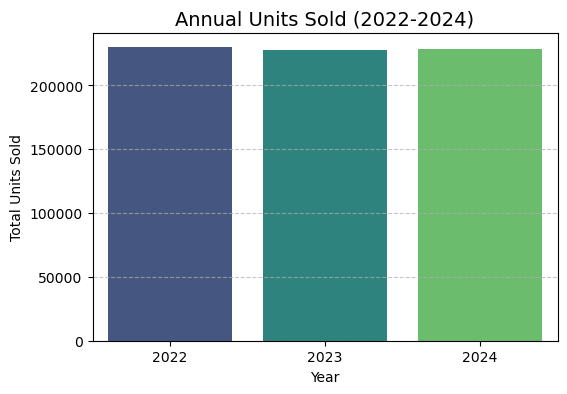

In [7]:
# Group by year and sum the units sold to see the annual trend
annual_sales = df.groupby("Year")["units_sold"].sum()
print("Total Sales across years (Units Sold): ")
print(annual_sales)

# Visualization: Annual Sales Trend
plt.figure(figsize=(6, 4))
sns.barplot(x=annual_sales.index, y=annual_sales.values, palette="viridis")
plt.title('Annual Units Sold (2022-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Observation: 
# Total sales witnessed a decline from 2022 to 2023, however it remained flat in 2024.

#### 3.3 Sales Performance during Promotion, Timing, and Holiday

In [9]:
# Sales with and without Promotion (promotion: 1=Yes, 0=No)
sales_without_promotion = df[df["promotion"] == 0]["units_sold"].sum()
sales_during_promotion = df[df["promotion"] == 1]["units_sold"].sum()

print(f"\nTotal sales without promotion (Units): {sales_without_promotion:,}")
print(f"Total sales during promotion (Units): {sales_during_promotion:,}")

# Sales by Day Type (weekend: 1=Weekend, 0=Weekday)
sales_weekday = df[df["weekend"] == 0]["units_sold"].sum()
sales_weekend = df[df["weekend"] == 1]["units_sold"].sum()

print(f"\nTotal sales during weekdays (Units): {sales_weekday:,}")
print(f"Total sales during weekends (Units): {sales_weekend:,}")

# Sales during and without Holiday (holidays: 1=Yes, 0=No)
sales_weekday = df[df["is_holiday"] == 0]["units_sold"].sum()
sales_weekend = df[df["is_holiday"] == 1]["units_sold"].sum()

print(f"\nTotal sales without holidays (Units): {sales_weekday:,}")
print(f"Total sales during holidays (Units): {sales_weekend:,}")


# Observation:
# Promotions, and Holidays did not play a major role in contributing to the sales growth
# Weekend sales contributed ~33% in the sales


Total sales without promotion (Units): 599,519
Total sales during promotion (Units): 86,629

Total sales during weekdays (Units): 459,688
Total sales during weekends (Units): 226,460

Total sales without holidays (Units): 674,230
Total sales during holidays (Units): 11,918


#### 3.4 Weekend Sales across the years

In [28]:
# 3.4 Weekend Sales across the years

#Filter data only for weekend
sales_weekend = df[df["weekend"] == 1]

#New data frame, grouping units sold acrosbs years
weekend_sales_years=sales_weekend.groupby("Year")["units_sold"].sum()


print(weekend_sales_years)


#Observation:
#Weekend sales witnessed constant decline from 2022 to 2024 

Year
2022    75786
2023    75492
2024    75182
Name: units_sold, dtype: int64


#### 3.5 Weekend sales analysis across region and year

In [32]:
# Group by region and year to see weekend sales trend
region_weekend = sales_weekend.groupby(["region","Year"])["units_sold"].sum().unstack()
region_weekend = region_weekend.sort_values(by = 2024, ascending = False)

#Add Total to the last
region_weekend.loc["Total"] = region_weekend.sum(axis=0)


print("\n Weekend Sales by Region and Year:")
print(region_weekend)

# Obervation:
# North and West sales declined during weekends 


 Weekend Sales by Region and Year:
Year     2022   2023   2024
region                     
South   23248  22855  23025
East    22229  22371  22324
North   15691  15469  15271
West    14618  14797  14562
Total   75786  75492  75182


#### 3.6 Weekend sales analysis across categories and year (for North)

In [38]:
# Weekend sales analysis for North, across categories for Years

# Filter data only for weekend
sales_weekend = df[df["weekend"] == 1]


# Fitler sales_weekend data frame by North Region
North_weekend = sales_weekend[sales_weekend["region"] == "North" ]

# Group by categories, and Year 
North_weekend_categories = North_weekend.groupby(["category","Year"])["units_sold"].sum().unstack()

# Sort categories by latest year (2024)
North_weekend_categories = North_weekend_categories.sort_values(by = 2024, ascending = False)


# Add Total to the last
North_weekend_categories.loc["Total"] = North_weekend_categories.sum(axis=0) 


print("\n Weekend Sales by Category and Year (for North):")
print(North_weekend_categories)


# Obervation:
# Clothing and Home segments are underperforming on weekends in 2024, from 2023
# Electronics segment was flat in 2024


 Weekend Sales by Category and Year (for North):
Year          2022   2023   2024
category                        
Clothing      5457   5138   5090
Home          4496   4888   4652
Electronics   3162   3130   3194
Beauty        1421   1308   1271
Sports        1155   1005   1064
Total        15691  15469  15271


#### 3.7 Weekend sales analysis across categories and year (for West)

In [40]:
# Weekend sales analysis for West, across categories for Years

# Filter data only for weekend
sales_weekend = df[df["weekend"] == 1]


# Fitler sales_weekend data frame by West Region
West_weekend = sales_weekend[sales_weekend["region"] == "West" ]

# Group by categories, and Year 
West_weekend_categories = West_weekend.groupby(["category","Year"])["units_sold"].sum().unstack()

# Sort categories by latest year (2024)
West_weekend_categories = West_weekend_categories.sort_values(by = 2024, ascending = False)


# Add Total to the last
West_weekend_categories.loc["Total"] = West_weekend_categories.sum(axis=0) 


print("\n Weekend Sales by Category and Year (for West):")
print(West_weekend_categories)


# Obervation:
# Clothing, Home, and Electronics segments are underperforming on weekends in 2024, from 2023 


 Weekend Sales by Category and Year (for West):
Year          2022   2023   2024
category                        
Clothing      4835   4932   4872
Home          4645   4591   4451
Electronics   2864   3123   2981
Beauty        1262   1104   1168
Sports        1012   1047   1090
Total        14618  14797  14562


### 4. Discounting Strategy Analysis

#### 4.1 Creating Discount Categories

In [10]:
# Function to bucket the discount percentage

def discount_bucket(x):
    if x == 0:
        return "No Discount (0%)"
    elif 5 <= x <= 10:
        return "Low Discount (5%-10%)"
    elif 15 <= x <= 30:
        return "High Discount (15%-30%)"
    else:
        return "Other"

# Apply the function to create a new categorical column
df["discount_category_bucket"] = df["discount_pct"].apply(discount_bucket)

print(df["discount_category_bucket"].value_counts(normalize=True).mul(100).round(1))

# Similarly, discounts was not a major factor in driving sales

discount_category_bucket
No Discount (0%)           70.0
Low Discount (5%-10%)      16.1
High Discount (15%-30%)    13.9
Name: proportion, dtype: float64


#### 4.2 Sales Trend by Discount Category


 Units Sold by Discount Category and Year: 
Year                        2022    2023    2024   Total
discount_category_bucket                                
High Discount (15%-30%)    33045   32797   33140   98982
Low Discount (5%-10%)      36790   37489   36392  110671
No Discount (0%)          160002  157805  158688  476495


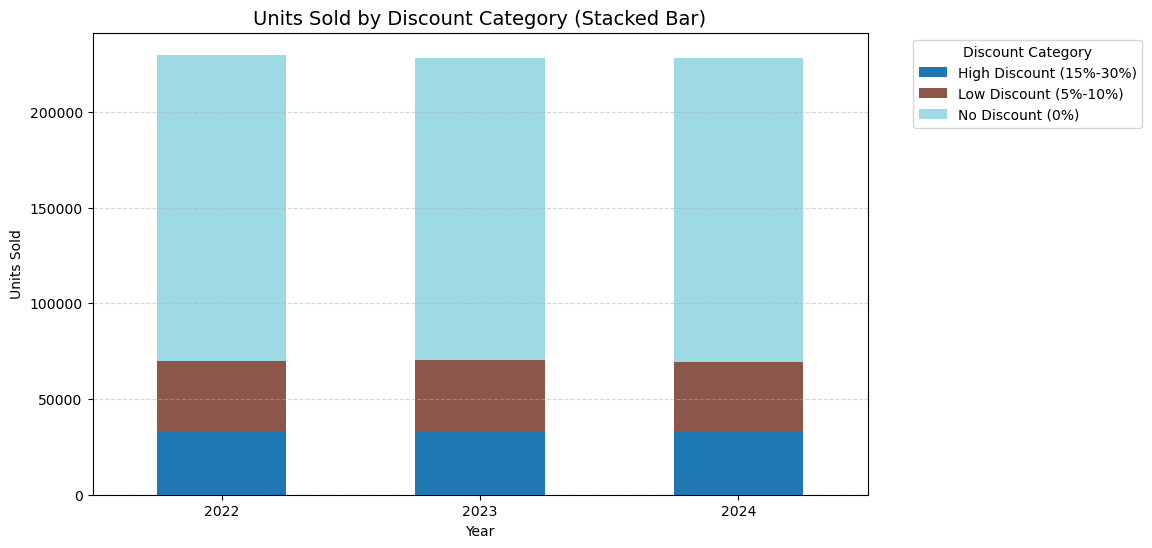

In [11]:
# Discounting analysis across Years in Units Sold
t_bct = df.groupby(["discount_category_bucket", "Year"])["units_sold"].sum().unstack(fill_value=0)
t_bct["Total"] = t_bct.sum(axis=1)

print("\n Units Sold by Discount Category and Year: ")
print(t_bct)

# Visualization: Discount Category Sales
t_bct_plot = t_bct.drop(columns=['Total']).T
t_bct_plot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Units Sold by Discount Category (Stacked Bar)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.xticks(rotation=0)
plt.legend(title='Discount Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Observation:
#70% sales were made at full price
#High Discounting (15%-30%) observed an increase in sales from 2023 to 2024
#14% contribution in units sold, from 15%-30% discounting in 2024

#### 4.3 High Discount (15-30%) Performance by Region

In [12]:
# Filter data for the High Discount segment
hda = df[df["discount_category_bucket"] == "High Discount (15%-30%)"]

# Units Sold under High Discount by Region and Year
high_discount_units = hda.groupby(["region", "Year"])["units_sold"].sum().unstack(fill_value=0)
high_discount_units["Total"] = high_discount_units.sum(axis=1)
high_discount_units = high_discount_units.sort_values(by="Total", ascending=False)

print("\n High Discount (15%-30%) Units Sold by Region: ")
print(high_discount_units)

# Net Revenue generated under High Discount by Region and Year
high_discount_revenue = hda.groupby(["region", "Year"])["net_revenue"].sum().unstack(fill_value=0)
high_discount_revenue["Total"] = high_discount_revenue.sum(axis=1)
high_discount_revenue = high_discount_revenue.sort_values(by="Total", ascending=False)

print("\n High Discount (15%-30%) Net Revenue by Region: ")
print(high_discount_revenue.applymap(lambda x: f'{x:,.2f}'))

# Observation: 
# Discount-led campaigns are driving strong demand and revenue in the **South** and **East** regions.
# Western and Northern regions show weaker traction, suggesting high discounts may be less effective there.


 High Discount (15%-30%) Units Sold by Region: 
Year    2022  2023   2024  Total
region                          
South   9997  9994  10345  30336
East    9686  9724   9889  29299
North   6597  6572   6748  19917
West    6765  6507   6158  19430

 High Discount (15%-30%) Net Revenue by Region: 
Year          2022        2023        2024         Total
region                                                  
South   386,814.97  392,603.79  405,765.49  1,185,184.25
East    372,649.53  373,816.74  398,512.17  1,144,978.44
West    277,611.63  254,954.79  249,198.82    781,765.24
North   248,494.93  258,617.71  259,994.48    767,107.12


#### 4.4 High Discount (15-30%) Performance by Category

In [51]:
# Units Sold under High Discount by Category and Year
high_discount_category = hda.groupby(["category", "Year"])["units_sold"].sum().unstack(fill_value=0)
high_discount_category["Total"] = high_discount_category.sum(axis=1)
high_discount_category = high_discount_category.sort_values(by="Total", ascending=False)

print("\nHigh Discount (15%-30%) Units Sold by Category: ")
print(high_discount_category)


# Net Revenue generated under High Discount by Category and Year
high_discount_revenue_category = hda.groupby(["category", "Year"])["net_revenue"].sum().unstack(fill_value=0)
high_discount_revenue_category["Total"] = high_discount_revenue_category.sum(axis=1)
high_discount_revenue_category = high_discount_revenue_category.sort_values(by="Total", ascending=False)

print("\n High Discount (15%-30%) Net Revenue by Category: ")
print(high_discount_revenue_category.applymap(lambda x: f'{x:,.2f}'))


# Observation: 
# **Clothing** and **Home** categories show the highest volume of units sold under high discounts,from 2023 to 2024,
# however their respective revenues witnessed a decline in the same period


High Discount (15%-30%) Units Sold by Category: 
Year          2022   2023   2024  Total
category                               
Clothing     11469  10994  11319  33782
Home          9625   9763   9812  29200
Electronics   6781   6987   6856  20624
Beauty        2841   2762   2771   8374
Sports        2329   2291   2382   7002

 High Discount (15%-30%) Net Revenue by Category: 
Year               2022        2023        2024         Total
category                                                     
Clothing     544,207.38  531,858.64  559,734.20  1,635,800.22
Home         231,413.34  231,842.62  229,595.17    692,851.13
Electronics  192,582.78  201,845.72  193,090.40    587,518.90
Beauty       188,687.78  183,064.14  198,164.02    569,915.94
Sports       128,679.78  131,381.91  132,887.17    392,948.86


### 5. Geographical Performance

#### 5.1 Regional Sales Leadership


Total Units Sold by Region (2022-2024): 
region
South    209292
East     202893
North    140047
West     133916
Name: units_sold, dtype: int64


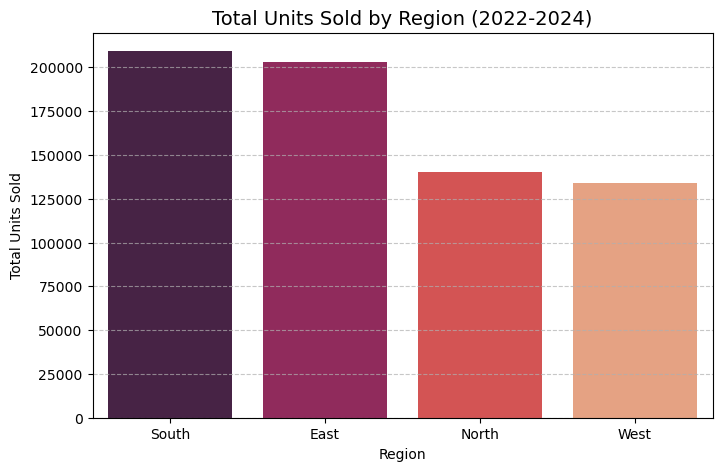

In [14]:
# Total units sold across all regions
regional_total_sales = df.groupby("region")["units_sold"].sum().sort_values(ascending=False)

print("\nTotal Units Sold by Region (2022-2024): ")
print(regional_total_sales)

# Visualization: Total Units Sold by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=regional_total_sales.index, y=regional_total_sales.values, palette="rocket")
plt.title('Total Units Sold by Region (2022-2024)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5.2 Regional Sales Trend over Time

In [58]:
# Units sold by Region across years
regional_annual_sales = df.groupby(["region", "Year"])["units_sold"].sum().unstack(fill_value=0)
regional_annual_sales["Total"] = regional_annual_sales.sum(axis=1)
regional_annual_sales = regional_annual_sales.sort_values(by = "Total", ascending = False) 

print("\n Units Sold by Region across Years: ")
print(regional_annual_sales)

# Observation:
# - **South** remained the top performing region in terms of sales volume
# - **North** witnessed a constant decline in units sold across the years
# - **West** is the lowest in absolute terms but shows a stable trend
# - **East** observed a stable growth across the years


 Units Sold by Region across Years: 
Year     2022   2023   2024   Total
region                             
South   70103  69266  69923  209292
East    67722  67752  67419  202893
North   47016  46719  46312  140047
West    44996  44354  44566  133916


#### 5.3 Categorical Sales Trend over Time

In [41]:
#Total Sales across categories across years

tcs = df.groupby(["category","Year"])["units_sold"].sum().unstack().sort_values(by=2024, ascending = False)
tcs["Total"]=tcs.sum(axis=1)

print("\n Units Sold by Categories across Years: ")
print(tcs)



# Clothing and Home happens to be top selling categories across the years, Electronics coming next in line
# Beauty and Sports are the least sold products


 Units Sold by Categories across Years: 
Year          2022   2023   2024   Total
category                                
Clothing     78689  77110  78069  233868
Home         67591  68721  68065  204377
Electronics  47912  46923  46830  141665
Beauty       19461  19442  19299   58202
Sports       16184  15895  15957   48036


### 6. Return_Rate_and_Performance

#### 6.1 Return Rate Analysis Across Regions


--- Average Return Rate (%) by Region and Year ---
Year    2022  2023  2024
region                  
North   2.20  2.04  2.12
East    2.04  2.03  2.02
South   1.89  1.91  1.98
West    1.95  2.08  1.96


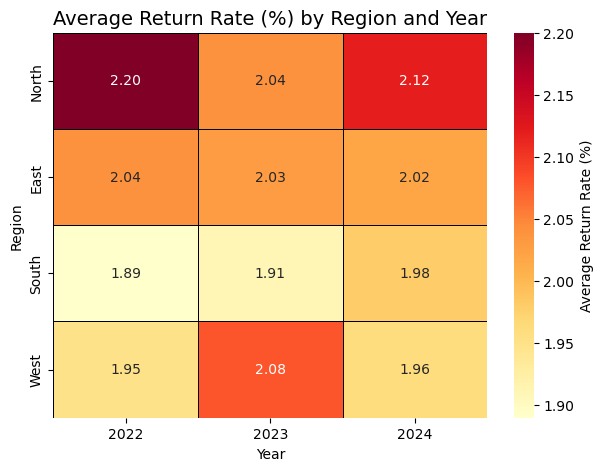

In [16]:
# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Average Return Rate by Region and Year
regional_return_rate = round(df.groupby(["region", "Year"])["Return Rate"].mean().unstack(), 2)
regional_return_rate = regional_return_rate.sort_values(by=2024, ascending=False)

print("\n--- Average Return Rate (%) by Region and Year ---")
print(regional_return_rate)


# Visualization: Return Rate Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(regional_return_rate, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=.5, 
            linecolor='black', cbar_kws={'label': 'Average Return Rate (%)'})
plt.title('Average Return Rate (%) by Region and Year', fontsize=14)
plt.ylabel('Region')
plt.xlabel('Year')
plt.show()


# Observation: 
# **North** and **South** witnessed an increase in the return rate from 2023 to 2024
# While the East and West regions saw a slight decline or stabilization.

#### 6.2 Return Rate Analysis Across Categories


--- Average Return Rate (%) by Category and Year ---
Year         2022  2023  2024
category                     
Sports       2.10  1.88  2.23
Electronics  1.98  2.01  2.12
Home         2.02  1.99  2.00
Clothing     2.01  2.08  1.96
Beauty       1.94  1.92  1.89


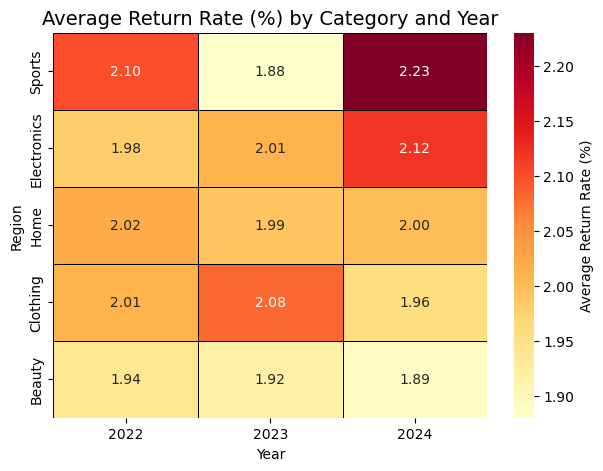

In [40]:
# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Average Return Rate by Category and Year
categorical_return_rate = round(df.groupby(["category", "Year"])["Return Rate"].mean().unstack(), 2)
categorical_return_rate = categorical_return_rate.sort_values(by=2024, ascending=False)

print("\n--- Average Return Rate (%) by Category and Year ---")
print(categorical_return_rate)


# Visualization: Return Rate Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(categorical_return_rate, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=.5, 
            linecolor='black', cbar_kws={'label': 'Average Return Rate (%)'})
plt.title('Average Return Rate (%) by Category and Year', fontsize=14)
plt.ylabel('Region')
plt.xlabel('Year')
plt.show()


# Observation: 
# All categories were heavily clustered around 2-2.4 return rate
# **Sports** and **Electronics** witnessed significant increase in its return rate from 2023 to 2024
# While Home segment saw a slight stabilization
# And Clothing, and Beauty witnessed a decrease in its return rate

#### 6.3 Return Rate Analysis Across clubbed (Regions and Categories) segments for 2024

In [39]:
# Return Rate category and regions wise analysis across 2024

# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Filter data for 2024
df_2024 = df[df["Year"] == 2024]

# Average Return Rate by Category and Region
both_return_rate = round(df_2024.groupby(["category", "region"])["Return Rate"].mean().unstack(), 2)

# Add average across regions for each category
both_return_rate["Average"] = both_return_rate.mean(axis=1)

# Sort categories by their average
both_return_rate = both_return_rate.sort_values(by="Average", ascending=False)

# Add total average row at the bottom
total_avg = both_return_rate.mean(numeric_only=True).to_frame().T
total_avg.index = ["Total Average"]

# Append total average to the table
both_return_rate = pd.concat([both_return_rate, total_avg])

print("\n--- Average Return Rate (%) by Category and Region ---")
print(both_return_rate)


--- Average Return Rate (%) by Category and Region ---
region          East  North  South   West  Average
Sports         2.210  2.220  2.570  1.760   2.1900
Electronics    1.940  2.360  1.950  2.380   2.1575
Home           2.100  1.930  1.980  1.940   1.9875
Clothing       1.960  2.110  1.950  1.810   1.9575
Beauty         1.880  2.270  1.540  2.050   1.9350
Total Average  2.018  2.178  1.998  1.988   2.0455


#### 6.4 Return Rate of Electronics Segment in North Region across Years

In [66]:
# Return Rate of Electronics category in North across Years

# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Filter data for North
df_North = df[df["region"] == "North"]

#Again filter the data for Electronics category
df_Elec = df_North[df_North["category"] == "Electronics" ]

# Average Return Rate of the df_Elec across years
Elec_return_rate = round(df_Elec.groupby("Year")["Return Rate"].mean(),2)



print("\n--- Average Return Rate of Electronics (North Region) across Years: ---")
print(Elec_return_rate)


#Observation:
# Return Rate declined in 2023 compared to 2022, but it witnessed significant increase in 2024 from 2023 (An area of concern)


--- Average Return Rate of Electronics (North Region) across Years: ---
Year
2022    2.00
2023    1.95
2024    2.36
Name: Return Rate, dtype: float64


#### 6.5 Electronics segment returned products in the North Region

In [18]:
#Top 5 Products in North region by Total return Volume

slw=df[df["region"]=="North"]
scs=slw.groupby(["product_id","category"])["returns"].sum().sort_values(ascending=False).head(5)
scs

product_id  category   
prod_039    Electronics    84
prod_005    Electronics    76
prod_034    Electronics    73
prod_023    Electronics    73
prod_001    Electronics    72
Name: returns, dtype: int64

#### 6.6 Return rate of stores in Northern region for Electronics category

In [42]:
#Return rate of stores in Northern region for Electronics category

# Filter for Northern region and Electronics category
north_elec = df[(df["region"] == "North") & (df["category"] == "Electronics")]

# Group by store and calculate return rate
store_return_rate = (
    north_elec.groupby("store_id")
    .agg({"returns": "sum", "units_sold": "sum"})
)

# Calculate return rate percentage
store_return_rate["return_rate_%"] = (
    store_return_rate["returns"] / store_return_rate["units_sold"] * 100
).round(2)

# Sort by highest return rate
store_return_rate = store_return_rate.sort_values(by="return_rate_%", ascending=False)

print(store_return_rate.head(10))  # Top 10 stores with highest return rate


          returns  units_sold  return_rate_%
store_id                                    
store_07      296       14409           2.05
store_08      283       14517           1.95


### 7. Pricing Analysis

#### 7.1 Average revenue made per transaction across regions

In [43]:
# Average net revenue per transaction

plh=round(df.groupby(["region","Year"])["net_revenue"].mean().unstack(),2)
plh=plh.sort_values(by=2024, ascending=False)
print(plh)

# Average net revenue/transaction witnessed an increase across the years

Year      2022    2023    2024
region                        
South   197.33  197.04  197.58
East    191.37  191.72  192.91
North   198.24  198.39  192.19
West    192.47  184.44  189.07


#### 7.2 Y-O-Y revenue growth across regions

In [14]:
#YoY Revenue Growth Percentage by Region:
YoY_Region = round(df.groupby(["Year", "region"])["net_revenue"].sum().pct_change().unstack(),3)
print(YoY_Region)

# South, and East regions observed a constant surge from 2022
# Whereas, North, and West witnessed a decline from 2022-2024

region   East  North  South   West
Year                              
2022      NaN -0.306  0.488 -0.350
2023    0.490 -0.306  0.487 -0.378
2024    0.576 -0.332  0.540 -0.364


#### 7.3 Y-O-Y revenue growth across categories

In [47]:
#YoY Revenue Growth Percentage by Category:
YOY_Category = round(df.groupby(["Year", "category"])["net_revenue"].sum().pct_change().unstack(),3)
print(YOY_Category)



# Beauty, Clothing, and Home segments witnessed an increase from 2022 to 2024
# Whereas, Electronics, and Sports constantly declined from 2024

category  Beauty  Clothing  Electronics   Home  Sports
Year                                                  
2022         NaN     1.900       -0.623  0.191  -0.445
2023       0.364     1.912       -0.629  0.245  -0.474
2024       0.422     1.941       -0.635  0.230  -0.465
